In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import sys
print(sys.path)  # 查看 Python 查找模块的路径

['C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus', 'C:\\Program Files\\JetBrains\\PyCharm 2024.3.1.1\\plugins\\python-ce\\helpers\\pydev', 'C:\\Program Files\\JetBrains\\PyCharm 2024.3.1.1\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Users\\Administrator\\anaconda3\\python311.zip', 'C:\\Users\\Administrator\\anaconda3\\DLLs', 'C:\\Users\\Administrator\\anaconda3\\Lib', 'C:\\Users\\Administrator\\anaconda3', 'C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus\\venv_infoclus', '', 'C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus\\venv_infoclus\\Lib\\site-packages', 'C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus\\venv_infoclus\\Lib\\site-packages\\win32', 'C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus\\venv_infoclus\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Administrator\\OneDrive - UGent\\Documents\\GitHub\\ExClus\\venv_infoclus\\Lib\\site-packages\\Pythonwin', 'C:/U

In [131]:
import os
import pickle
import sys
import subprocess

from infoclus_utils import get_project_root
from sklearn.cluster import AgglomerativeClustering, KMeans
from infoclus2 import InfoClus


In [132]:
ROOT_DIR = get_project_root()
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, "src"))

dataset_name = 'cytometry_2500'
# dataset_name = 'german_socio_eco'
# dataset_name = 'mushroom'

embedding_name = 'tsne'
modify_hierarchy = False
model = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
# model = KMeans(n_clusters=3, random_state=42)

In [133]:
if __name__ == "__main__":
    if isinstance(model, AgglomerativeClustering):
        infoclus_object_path = os.path.join(ROOT_DIR, 'data', dataset_name, f'{dataset_name}_{embedding_name}_agglomerative_{model.linkage}.pkl')
    if isinstance(model, KMeans):
        infoclus_object_path = os.path.join(ROOT_DIR, 'data', dataset_name, f'{dataset_name}_{embedding_name}_kmeans_{model.n_clusters}.pkl')
    if_exists = os.path.exists(infoclus_object_path)

    if if_exists:
        with open(os.path.join(infoclus_object_path), 'rb') as f:
            infoclus = pickle.load(f)
    else:
        infoclus = InfoClus(dataset_name=dataset_name, main_emb=embedding_name, model=model,
                            Allow_cache = False,
                            Modify_hierarchical = modify_hierarchy,
                            Base_Clusters = 1000)

Initializing InfoClus ...
Initialization done, time: 5.306063890457153 s


In [134]:
infoclus.modify_hierarchical

False

In [139]:
alpha = 1700
beta = 1.5
min_att=2
max_att=5
runtime_id=7

splitting_startegies = ['by_node','by_sibling']
infoclus.optimise(alpha=alpha,beta=beta,min_att=min_att,max_att=max_att,runtime_id=runtime_id,
                  Show_brief_result = False, # if False, show clusters and attributes
                  Allow_cache = False,
                  splitting_startegy=splitting_startegies[0])


splitting by nodes start ... 
26 iterations done.

InfoClus - Dataset: cytometry_2500 Emb: tsne Alpha: 1700 Beta: 1.5 Ref. Runtime: 180
checking if the sum of clusters idxes equals to the data size: Count of Clusters: 6
    cluster 0:
        count of points: 85
        attributes: CD161 CD19 
    cluster 1:
        count of points: 1607
        attributes: CD19 CD3 MHCII CD11c CD11b 
    cluster 2:
        count of points: 618
        attributes: CD3 CD19 MHCII CD11c CD64 
    cluster 3:
        count of points: 21
        attributes: Ly6G CD11b 
    cluster 4:
        count of points: 91
        attributes: CD11c CD11b 
    cluster 5:
        count of points: 78
        attributes: CD64 Autofluo. CD11b 
SI:  5.031929451178627


(array([1, 2, 1, ..., 4, 2, 1]),
 array([[ 40.57305 ,   9.45594 ],
        [-26.745049, -43.21193 ],
        [ 43.022877,  13.211735],
        ...,
        [-48.956753,  23.021223],
        [-16.380745, -45.264076],
        [-13.237447,  10.439111]], dtype=float32))

Visualization for hierarchy modified by k-medoids

In [136]:
infoclus._si_opt

np.float64(5.005423638929537)

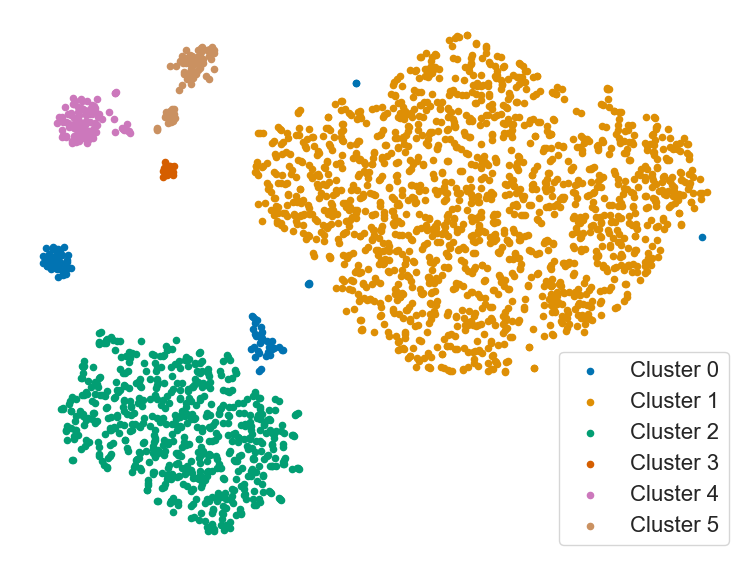

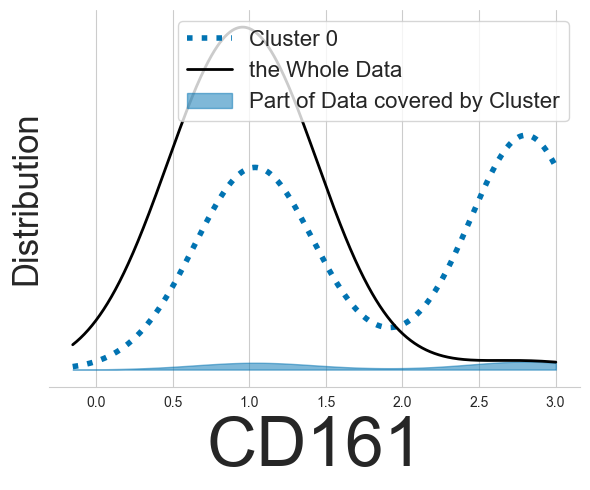

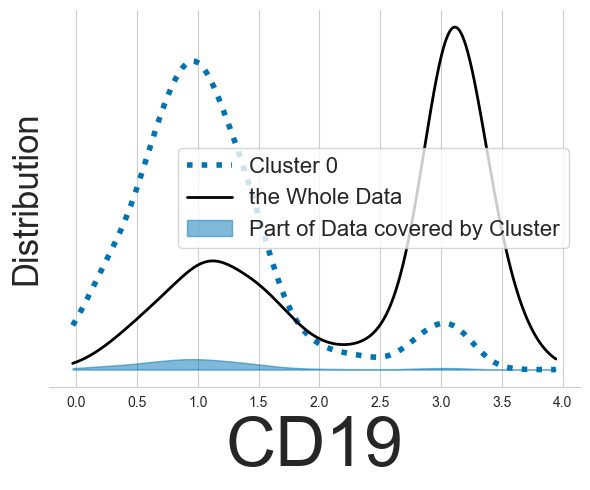

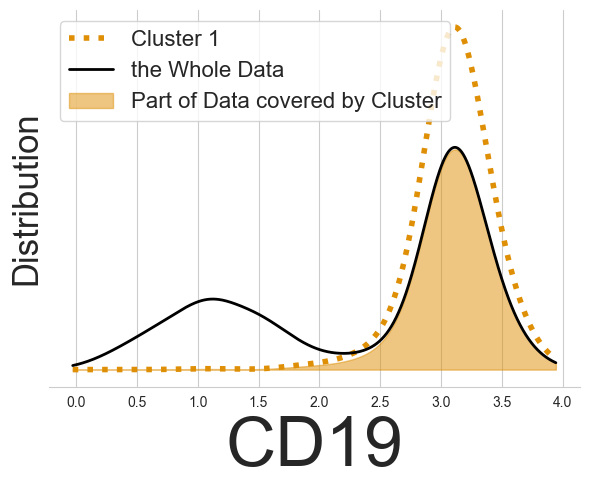

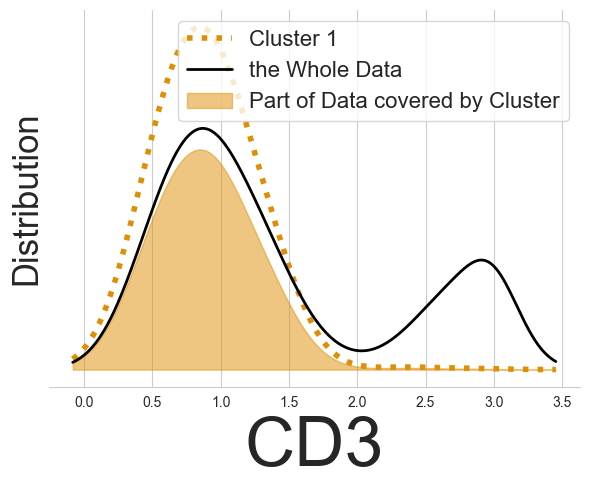

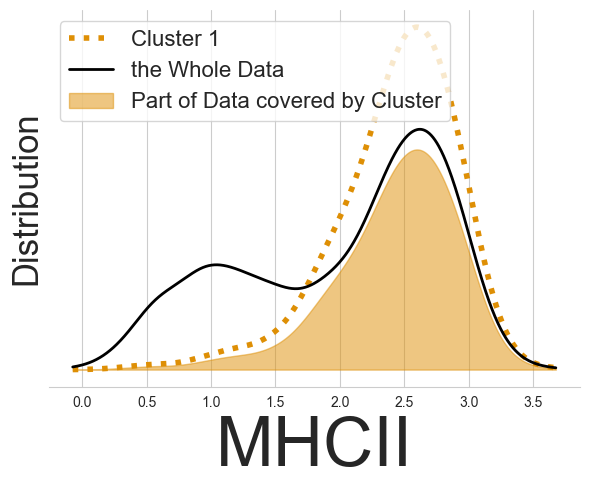

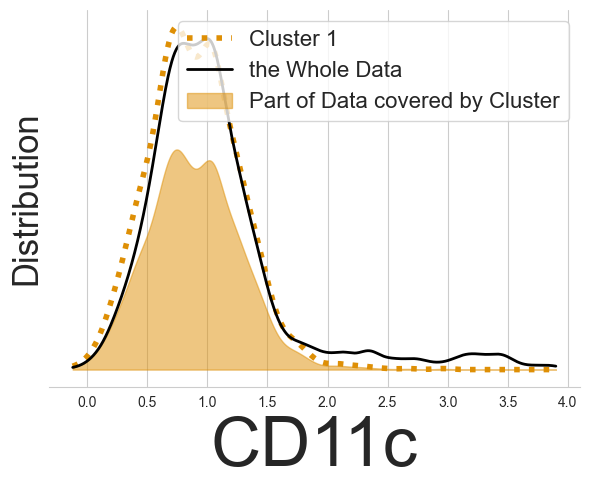

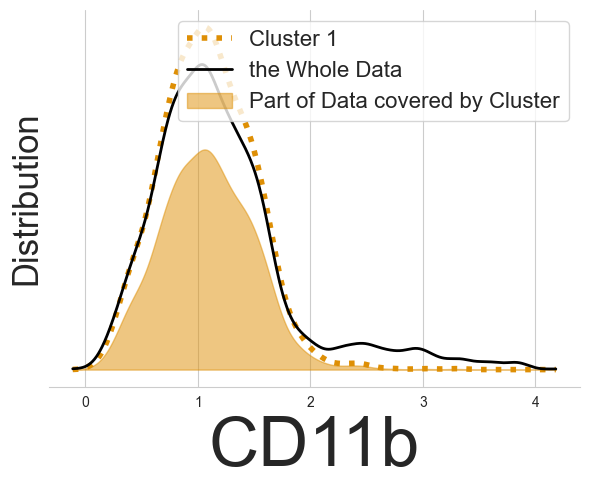

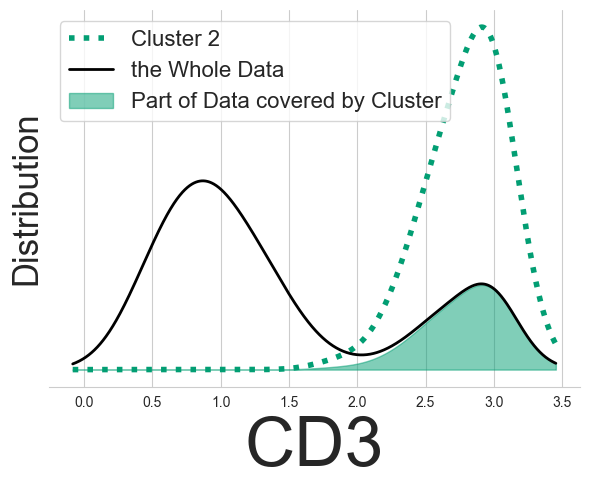

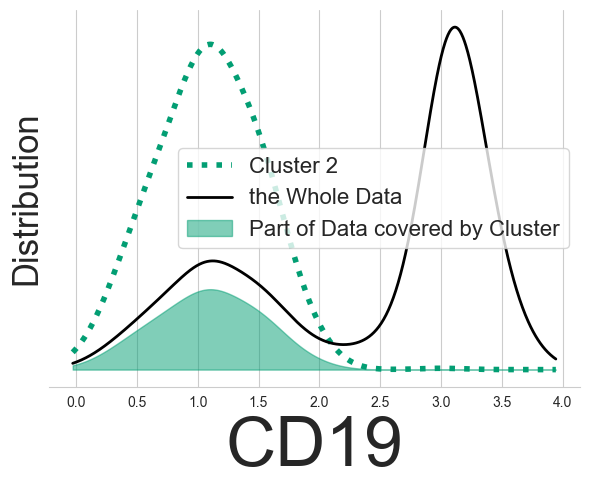

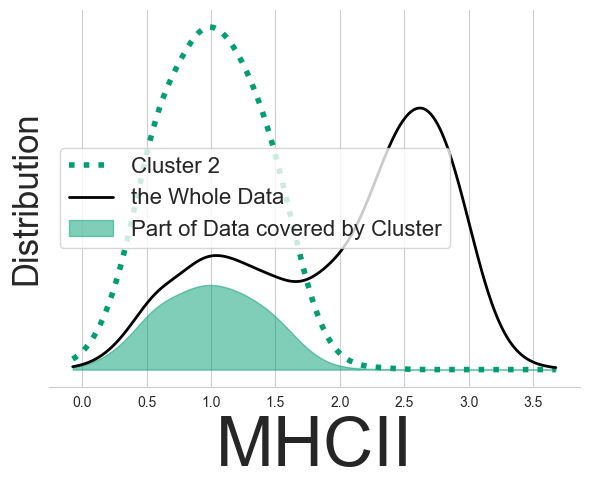

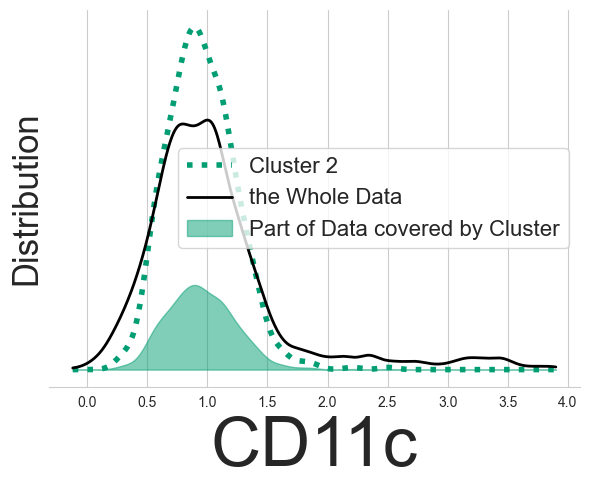

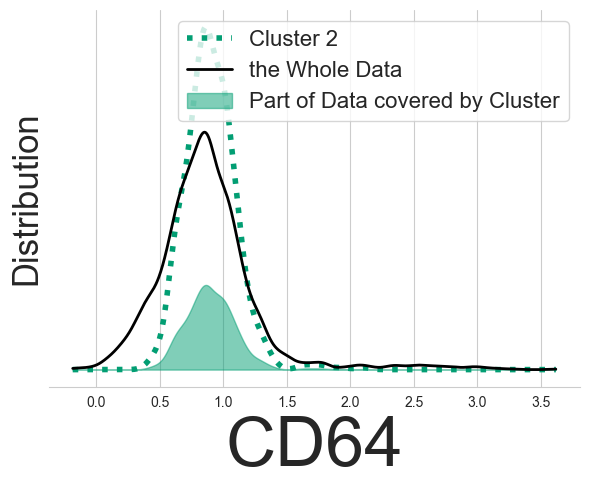

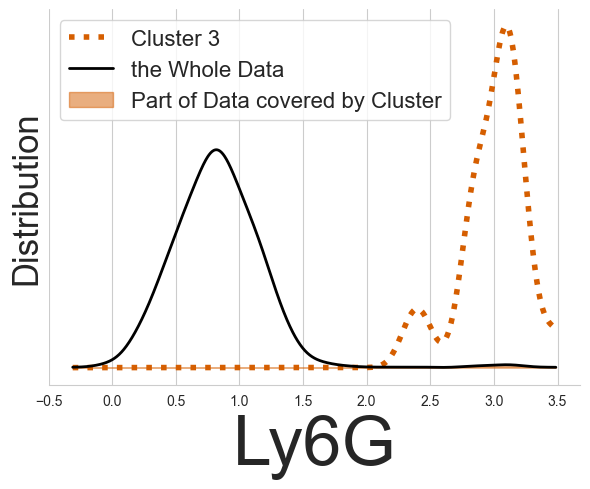

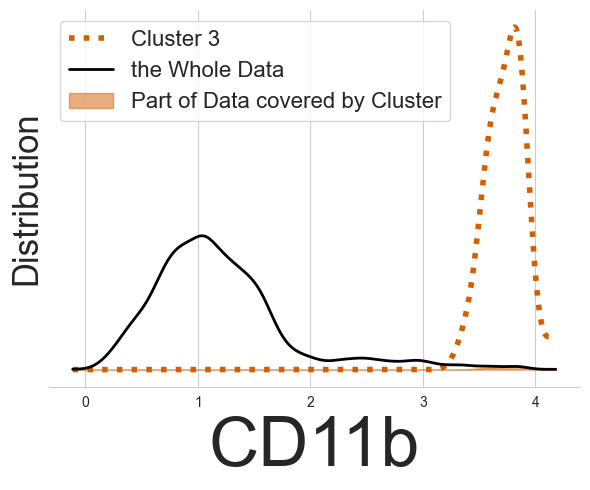

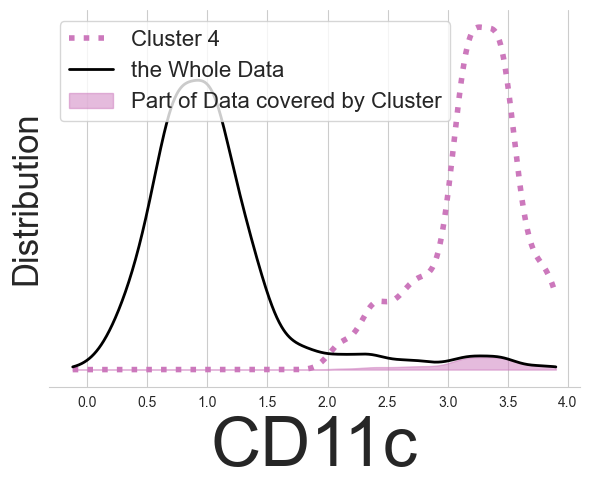

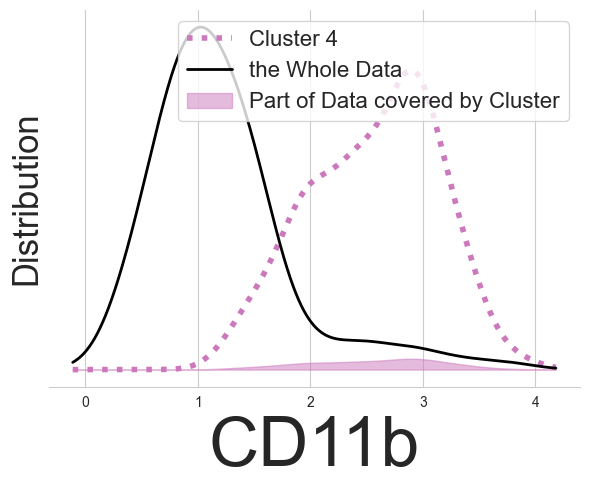

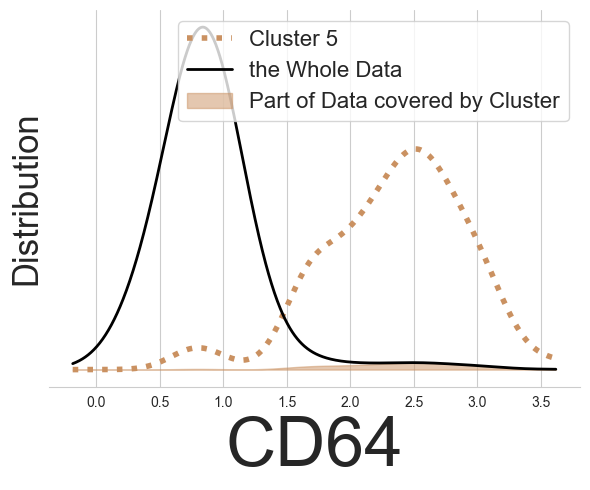

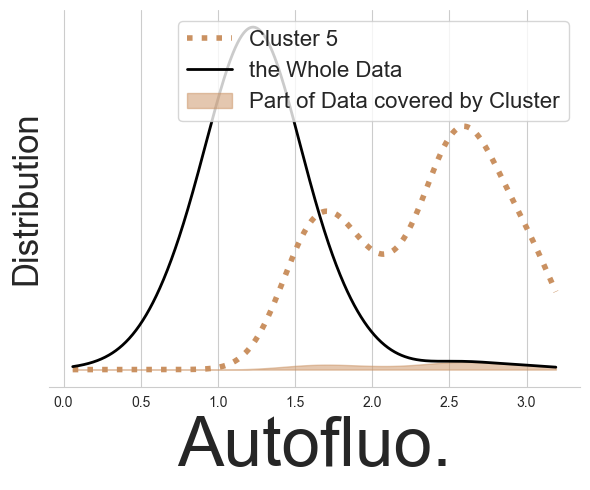

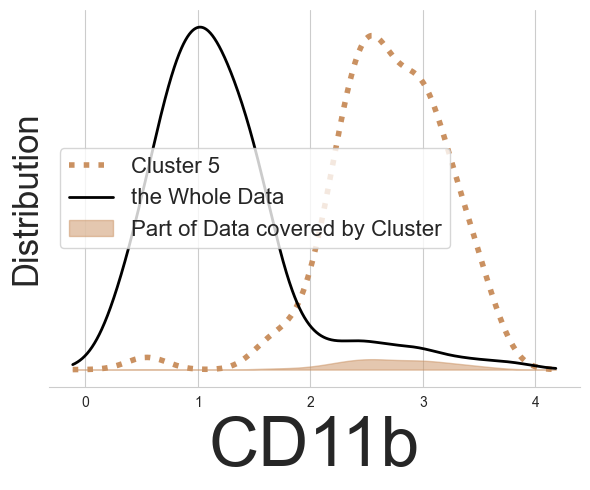

In [140]:
infoclus.visualize_result(show_now_embedding=True,save_embedding=False, show_now_explanation=False,save_explanation=False)

In [138]:
import plotly.graph_objects as go
import numpy as np

import plotly.graph_objects as go
import numpy as np

embedding = infoclus.original_embedding  # shape: (n_samples, 2)
labels = infoclus.kmedoids_clustering

unique_labels = np.unique(labels)

fig = go.Figure()

for label in unique_labels:
    # 每个类别一条 trace
    mask = labels == label
    points = embedding[mask]

    fig.add_trace(go.Scatter(
        x=points[:, 0],
        y=points[:, 1],
        mode='markers',
        name=f'Cluster {label}',
        hoverinfo='text',
        text=[f'Cluster: {label}'] * len(points),
        marker=dict(size=6, opacity=0.8),
        legendgroup=str(label),
        hovertemplate="Cluster: " + str(label) + "<extra></extra>"
    ))

# 添加一些布局美化
fig.update_layout(
    title=f"k-medoids clustering on all points",
    template="simple_white",
    hovermode='closest',
    height=600,
    width=800
)

fig.show()

########################################################################################################################
data = infoclus.original_data_raw.values
labels = infoclus._clustering_opt[infoclus.kmedoids_clustering]
embedding = infoclus.original_embedding

att_names = infoclus.data_raw.columns.values
unique_classes = np.unique(labels)
num_classes = len(unique_classes)

# 使用 seaborn 的调色板，生成 RGB
import seaborn as sns
colors = sns.color_palette("colorblind", num_classes)

# 构建交互式图形
fig = go.Figure()

for i, cls in enumerate(unique_classes):
    class_points = embedding[labels == cls]
    fig.add_trace(go.Scatter(
        x=class_points[:, 0],
        y=class_points[:, 1],
        mode='markers',
        name=f'Cluster {cls}',
        marker=dict(color='rgba' + str(colors[i] + (0.8,)), size=6),
        text=[f'Cluster: {cls}'] * len(class_points),
        hoverinfo='text'
    ))

# 美化布局
fig.update_layout(
    title="K-Medoids - hierarchical Clustering on all points",
    xaxis_title="Component 1",
    yaxis_title="Component 2",
    template="simple_white",
    legend_title_text="Clusters",
    height=600,
    width=800
)

fig.show()


###############################################################################################################
data = infoclus.data.values
labels = infoclus._clustering_opt
embedding = infoclus.embedding

att_names = infoclus.data_raw.columns.values
unique_classes = np.unique(labels)
num_classes = len(unique_classes)

# 使用 seaborn 的调色板，生成 RGB
import seaborn as sns
colors = sns.color_palette("colorblind", num_classes)

# 构建交互式图形
fig = go.Figure()

for i, cls in enumerate(unique_classes):
    class_points = embedding[labels == cls]
    fig.add_trace(go.Scatter(
        x=class_points[:, 0],
        y=class_points[:, 1],
        mode='markers',
        name=f'Cluster {cls}',
        marker=dict(color='rgba' + str(colors[i] + (0.8,)), size=6),
        text=[f'Cluster: {cls}'] * len(class_points),
        hoverinfo='text'
    ))

# 美化布局
fig.update_layout(
    title="K-Medoids - hierarchical Clustering on medoids",
    xaxis_title="Component 1",
    yaxis_title="Component 2",
    template="simple_white",
    legend_title_text="Clusters",
    height=600,
    width=800
)

fig.show()


AttributeError: 'InfoClus' object has no attribute 'original_embedding'